<a href="https://colab.research.google.com/github/Isabela-SAG/Isabela-SAG/blob/main/looqbox_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.freecodecamp.org/portuguese/news/como-criar-e-manipular-bancos-de-dados-sql-com-python/

## Segunda parte do desafio

**Cases**

#### Para poder usar sql e python

In [1]:
pip install mysql-connector-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.4 MB 65.3 MB/s 


#### Importações

In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

#### Conexão

In [3]:
# conectando ao servidor
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [4]:
connection = create_server_connection("35.199.127.241", "looqbox-challenge", "looq-challenge")

MySQL Database connection successful


In [5]:
# contectando ao banco de dados
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection
    
# Conectando ao database
connection = create_db_connection("35.199.127.241", "looqbox-challenge", "looq-challenge", "looqbox_challenge")

MySQL Database connection successful


In [6]:
# Criando uma função para execução de consultas
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [7]:
# Lendo uma query
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [8]:
# Testes

#Inicializa uma lista vazia 
from_db = []

q1 = "SELECT * FROM data_store_cad"
connection = create_db_connection("35.199.127.241", "looqbox-challenge", "looq-challenge", "looqbox_challenge")
results = read_query(connection, q1)

for result in results:
  from_db.append(result)
columns = ["STORE_CODE", "STORE_NAME","START_DATE","END_DATE","BUSINESS_NAME","BUSINESS_CODE"]
pd.DataFrame(from_db,columns=columns)

MySQL Database connection successful


,STORE_CODE,STORE_NAME,START_DATE,END_DATE,BUSINESS_NAME,BUSINESS_CODE
0,1,Sao Paulo,2006-10-01,,Varejo,1
1,2,Chicago,2007-10-01,,Varejo,1
2,3,Roma,2008-10-01,,Varejo,1
3,4,Tokio,2009-10-01,,Varejo,1
4,5,Paris,2019-01-01,,Proximidade,2
5,6,Berlin,2011-10-01,,Proximidade,2
6,7,New York,2012-10-01,,Proximidade,2
7,8,Belem,2013-10-01,,Proximidade,2
8,9,London,2014-10-01,,Farma,4
9,10,Hong Kong,2019-01-01,,Farma,4


### 1. The Dev Team was tired of developing the same old queries just varying the filters accordingly to their boss demands.

As a new member of the crew, your mission now is to create a dynamic function in Python, on the most flexible of ways, to produce queries and retrieve a dataframe based on three parameters:

- product_code: integer

- store_code: integer

- date: list of ISO-like strings

- Date e.g.

 - ['2019-01-01', '2019-01-31']


It should look like this my_data = retrieve_data(product_code, store_code, date)

Make your team proud!

Extra instructions: Retrieve all columns from table data_product_sales.

https://www.youtube.com/watch?v=rxd08OdoZHw

In [131]:
def retrieve_data(product_code, store_code, date):
  '''
  Dado o código do produto, o código da loja e um período, esta função retorna um 
  dataframe com o valor de vendas e a quantidade de vendas
  '''
  ## Criação e leitura da query
  query= "SELECT * FROM data_product_sales"
  results = read_query(connection, query)

  ## Criação e manipulação do dataframe
  columns = ["STORE_CODE", "PRODUCT_CODE", "DATE", "SALES_VALUE", "SALES_QTY"]
  my_data = pd.DataFrame(results,columns=columns)

  # Seleção das variáveis
  my_data['STORE_CODE'] = my_data['STORE_CODE'].astype(int) # As colunas / variáveis precisam ser do tipo certo
  date = [datetime.strptime(date[0],'%Y-%m-%d').date(),datetime.strptime(date[1],'%Y-%m-%d').date()]  # As colunas / variáveis precisam ser do tipo certo
  selecao = my_data[(my_data['PRODUCT_CODE'] == product_code) & (my_data['STORE_CODE'] == store_code) & (my_data["DATE"] >= date[0]) & (my_data["DATE"] <= date[1])].index
  my_data = my_data.loc[selecao]

  return my_data

In [132]:
# Teste
date = ['2019-01-01', '2019-01-31']
retrieve_data(18, 1, date)

,STORE_CODE,PRODUCT_CODE,DATE,SALES_VALUE,SALES_QTY
0,1,18,2019-01-01,708.50,65
1,1,18,2019-01-02,1297.10,119
2,1,18,2019-01-03,1144.50,105
3,1,18,2019-01-04,1090.00,100
4,1,18,2019-01-05,893.80,82
5,1,18,2019-01-06,741.20,68
6,1,18,2019-01-07,654.00,60
7,1,18,2019-01-08,741.20,68
8,1,18,2019-01-09,1373.40,126
9,1,18,2019-01-10,1068.20,98


### 2. A brand new client sent you two ready-to-go queries. Those are listed below:

Query 1:



```
SELECT
      STORE_CODE,
      STORE_NAME,
      START_DATE,
      END_DATE,
      BUSINESS_NAME,
      BUSINESS_CODE
FROM data_store_cad
```

Query 2:

```
SELECT
        STORE_CODE,
        DATE,
        SALES_VALUE,
        SALES_QTY
FROM data_store_sales
WHERE DATE BETWEEN '2019-01-01' AND '2019-12-31'
```

In addition, he gave you this set of instructions:

- You must not modify my queries!

- Please filter the period between this given range:

 - ['2019-10-01','2019-12-31']

We are in need of this visualization! Please, create it with Python

In [133]:
# Leitura das queries
q1 = "SELECT STORE_CODE, STORE_NAME, START_DATE, END_DATE, BUSINESS_NAME, BUSINESS_CODE FROM data_store_cad"
q2 = "SELECT STORE_CODE, DATE, SALES_VALUE, SALES_QTY FROM data_store_sales WHERE DATE BETWEEN '2019-01-01' AND '2019-12-31'"

q1 = read_query(connection, q1)
q2 = read_query(connection, q2)

# Transformando em DataFrame
c1 = ["STORE_CODE", "Loja", "START_DATE", "END_DATE", "Categoria", "BUSINESS_CODE"]
q1 = pd.DataFrame(q1,columns = c1)

c2 = ["STORE_CODE", "DATE", "SALES_VALUE", "SALES_QTY"]
q2 = pd.DataFrame(q2,columns = c2)

# Primeiro vamos filtrar o período - ['2019-10-01','2019-12-31'] -> só precisa retirar as datas anteriores a '2019-10-01'
p1 = datetime.strptime('2019-10-01', '%Y-%m-%d').date()
q2 = q2.loc[q2[q2['DATE'] >= p1].index]

# Juntar os dataframes
df = q1.merge(q2, on = "STORE_CODE", how='left')

# Calcula o ticket médio e faz a visualização requerida
df["TM"] = df['SALES_VALUE']/df["SALES_QTY"]
df = df[["Loja","Categoria","TM"]]
df = df.groupby(by=["Loja","Categoria"]).mean()
df["TM"] = round(df["TM"],2)

# Visualização
df

,,TM
Loja,Categoria,
Bahia,Atacado,15.39
Bangkok,Posto,13.67
Belem,Proximidade,15.37
Berlin,Proximidade,15.39
Buenos Aires,Atacado,15.39
Chicago,Varejo,15.53
Dubai,Atacado,15.39
Hong Kong,Farma,26.35
London,Farma,28.99


### 3. Building your own visualization

Create at least one chart using the table IMDB_movies. The code must be in Python, and you are free to use any libraries, data in the table and graphic format. Explain why you chose the visualization (or visualizations) you are submitting.


In [152]:
# Obtendo todos os dados da table
query = "SELECT * FROM IMDB_movies" 
table = read_query(connection, query)

columns = ["id", "Title","Genre","Director","Actors","Year","Runtime","Rating","Votes","RevenueMillions","Metascore"]
table = pd.DataFrame(table,columns=columns)

**Opinião dos espectadores**

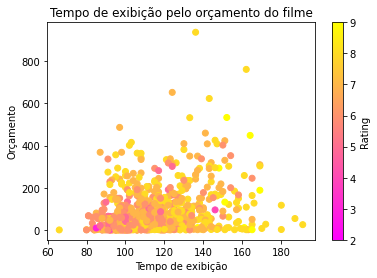

In [153]:
# Gosto do público em relação ao tempo de exibição ao orçamento
plt.scatter(x=table['Runtime'],y=table['RevenueMillions'],c=table["Rating"],cmap="spring")
plt.colorbar(label="Rating", orientation="vertical") 
plt.title("Tempo de exibição pelo orçamento do filme")
plt.xlabel("Tempo de exibição")
plt.ylabel("Orçamento")

plt.show()

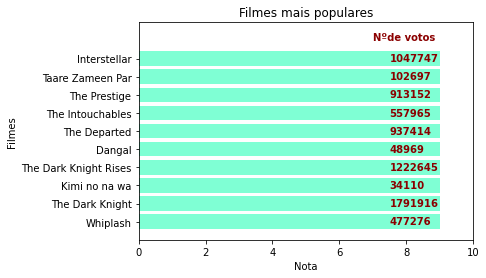

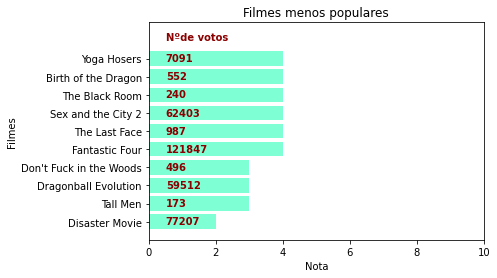

In [154]:
## Títulos
# ordenando pelo "Ranting"
table = table.sort_values(by='Rating')

# Títulos mais populares populares
plt.barh(table["Title"].tail(10),table["Rating"].tail(10),color='aquamarine')
plt.text(7,10,"Nºde votos",color='darkred', fontweight = 'bold')
for i, v in enumerate(table["Votes"].tail(10)): 
    plt.text(7.5, i - 0.15, str(v),  
            color = 'darkred', fontweight = 'bold') 
plt.xlim(0,10)
plt.ylim(-1,11)
plt.title("Filmes mais populares")
plt.ylabel("Filmes")
plt.xlabel("Nota")
plt.show()

# Títulos menos populares populares
plt.barh(table["Title"].head(10),table["Rating"].head(10),color='aquamarine')
plt.text(0.5,10,"Nºde votos",color='darkred', fontweight = 'bold')
for i, v in enumerate(table["Votes"].head(10)): 
    plt.text(0.5, i - 0.15, str(v),  
            color = 'darkred', fontweight = 'bold') 
plt.xlim(0,10)
plt.ylim(-1,11)
plt.title("Filmes menos populares")
plt.ylabel("Filmes")
plt.xlabel("Nota")
plt.show()